In [ ]:
important_plays = data[data['important_play']].copy()
important_plays['down'].fillna(0, inplace=True)
important_plays['down'] = important_plays['down'].astype(int)

important_plays['num_important_plays'] = important_plays['sack'] + important_plays['return_touchdown'] + important_plays['turnover'] + important_plays['safety'] + important_plays['blocked_kick']
x = important_plays[important_plays['num_important_plays'] == 2]

running_plays = data[data['play_type'] == 'run']


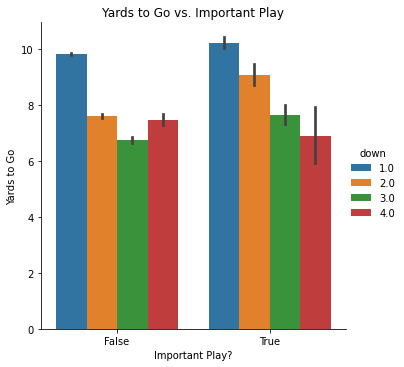

In [ ]:
sns.catplot(x='important_play', y='ydstogo', hue='down', kind='bar', data=data).set(title='Yards to Go vs. Important Play', xlabel='Important Play?', ylabel='Yards to Go')

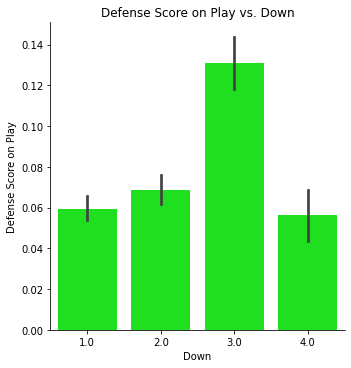

In [ ]:
sns.catplot(x='down', y='def_score_onplay', kind='bar', color='lime', data=data).set(title='Defense Score on Play vs. Down', xlabel='Down', ylabel='Defense Score on Play')




Ttest_indResult(statistic=-6.935126141941063, pvalue=4.189841535878651e-12)

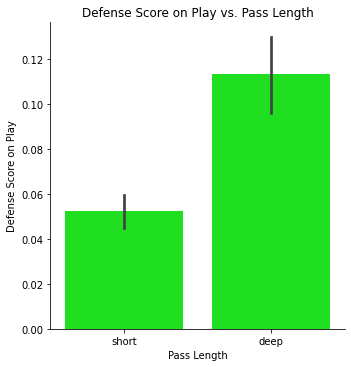

In [ ]:
sns.catplot(x='pass_length', y='def_score_onplay', kind='bar', color='lime', data=data).set(title='Defense Score on Play vs. Pass Length', xlabel='Pass Length', ylabel='Defense Score on Play')

control = data[data['pass_length'] == 'short']['def_score_onplay']
intervention = data[data['pass_length'] == 'deep']['def_score_onplay']

stats.ttest_ind(control, intervention)

Ttest_indResult(statistic=2.4707770241964706, pvalue=0.013485395597083769)

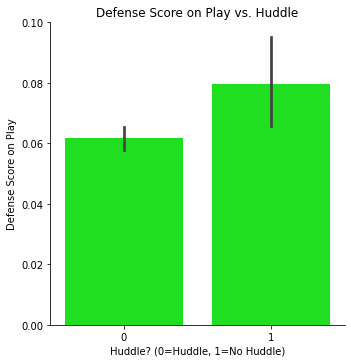

In [ ]:
sns.catplot(x='no_huddle', y='def_score_onplay', kind='bar', color='lime', data=data).set(title='Defense Score on Play vs. Huddle', xlabel='Huddle? (0=Huddle, 1=No Huddle)', ylabel='Defense Score on Play')

control = data[data['no_huddle'] == 1]['def_score_onplay']
intervention = data[data['no_huddle'] == 0]['def_score_onplay']

stats.ttest_ind(control, intervention)

Ttest_indResult(statistic=-28.277902676815188, pvalue=1.9739164128509924e-174)

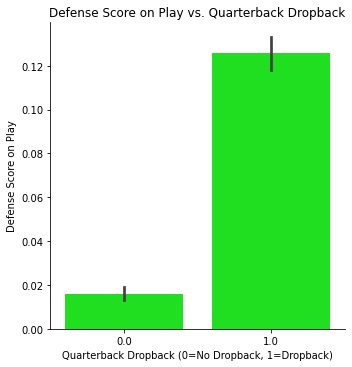

In [ ]:
sns.catplot(x='qb_dropback', y='def_score_onplay', kind='bar', color='lime', data=data).set(title='Defense Score on Play vs. Quarterback Dropback', xlabel='Quarterback Dropback (0=No Dropback, 1=Dropback)', ylabel='Defense Score on Play')

control = data[data['qb_dropback'] == 0]['def_score_onplay']
intervention = data[data['qb_dropback'] == 1]['def_score_onplay']

stats.ttest_ind(control, intervention)

Ttest_indResult(statistic=3.8763278519709607, pvalue=0.00010618429517209115)

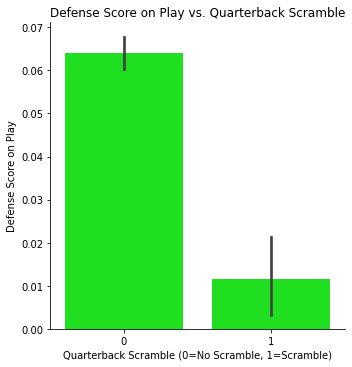

In [ ]:
sns.catplot(x='qb_scramble', y='def_score_onplay', kind='bar', color='lime', data=data).set(title='Defense Score on Play vs. Quarterback Scramble', xlabel='Quarterback Scramble (0=No Scramble, 1=Scramble)', ylabel='Defense Score on Play')

control = data[data['qb_scramble'] == 0]['def_score_onplay']
intervention = data[data['qb_scramble'] == 1]['def_score_onplay']

stats.ttest_ind(control, intervention)

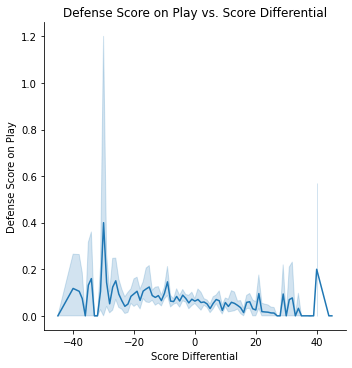

In [ ]:
sns.relplot(x='score_differential', y='def_score_onplay', kind='line', data=data).set(title='Defense Score on Play vs. Score Differential', xlabel='Score Differential', ylabel='Defense Score on Play')


In [ ]:
# play type, no huddle, qb dropback, qb scramble
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy: 0.9843345111896349


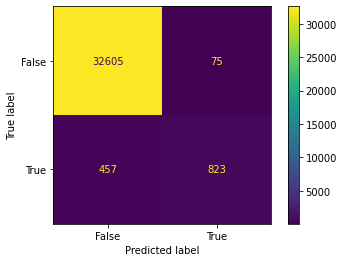

In [ ]:
info = data.drop(columns=['important_play'])
target = data['important_play']

train_data, test_data, train_target, test_target = train_test_split(info, target, test_size = 0.7, random_state=216)

model_data = OneHotEncoder().fit_transform(train_data[['play_type', 'no_huddle', 'qb_dropback', 'qb_scramble', 'pass_length']].values).toarray()
test_data = OneHotEncoder().fit_transform(test_data[['play_type', 'no_huddle', 'qb_dropback', 'qb_scramble', 'pass_length']].values).toarray()

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=model_data, y=train_target)
predicted = logistic_model.predict(test_data)
score = accuracy_score(predicted, test_target)
plot_confusion_matrix(logistic_model, test_data, test_target)
print("accuracy:", score)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = data[data["important_play"] == True]
inputs = OneHotEncoder().fit_transform(df[['play_type', 'no_huddle', 
                                                     'qb_dropback', 'qb_scramble', 'pass_length']].values).toarray()
target = df['def_score_onplay'].values


linear_model = LinearRegression()
linear_model.fit(X=inputs, y=target)
df["predicted_score"] = linear_model.predict(inputs)
q2_r2 = r2_score(df['def_score_onplay'].values, df['predicted_score'].values)

mse = mean_squared_error(df["def_score_onplay"].values, df["predicted_score"].values)
r2 = r2_score(df["def_score_onplay"].values, df["predicted_score"].values)

print("MSE:", mse)
print("r^2:", r2)

MSE: 1.3627904365622932
r^2: 0.2346803740659632


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
